In [1]:
import pandas as pd

In [2]:
r=pd.read_csv("creditdata.csv")
print(r.head(5))

   ID  LIMIT_BAL SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000   F  University  Married   24      2      2     -1     -1   
1   2     120000   F  University   Single   26     -1      2      0      0   
2   3      90000   F  University   Single   34      0      0      0      0   
3   4      50000   F  University  Married   37      0      0      0      0   
4   5      50000   M  University  Married   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default   
0         0         0         0         Y  
1   

In [3]:
r['default ']=r['default '].map({'Y':1,'N':0})
print(r['default '])

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default , Length: 30000, dtype: int64


In [4]:
print(r['default '])

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default , Length: 30000, dtype: int64


In [5]:
r.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [7]:
# drop the row if it has text in it
r.drop(columns=[ 'SEX', 'EDUCATION', 'MARRIAGE',], inplace=True)

In [8]:
# changing all values from objects to
r = r.apply(pd.to_numeric, errors='coerce')

In [9]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   AGE        30000 non-null  int64
 3   PAY_0      30000 non-null  int64
 4   PAY_2      30000 non-null  int64
 5   PAY_3      30000 non-null  int64
 6   PAY_4      30000 non-null  int64
 7   PAY_5      30000 non-null  int64
 8   PAY_6      30000 non-null  int64
 9   BILL_AMT1  30000 non-null  int64
 10  BILL_AMT2  30000 non-null  int64
 11  BILL_AMT3  30000 non-null  int64
 12  BILL_AMT4  30000 non-null  int64
 13  BILL_AMT5  30000 non-null  int64
 14  BILL_AMT6  30000 non-null  int64
 15  PAY_AMT1   30000 non-null  int64
 16  PAY_AMT2   30000 non-null  int64
 17  PAY_AMT3   30000 non-null  int64
 18  PAY_AMT4   30000 non-null  int64
 19  PAY_AMT5   30000 non-null  int64
 20  PAY_AMT6   30000 non-null  int64
 21  default    3

In [10]:
print(r.columns)
c = r.columns.get_loc('default ')
print(c)

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')
21


In [11]:
# Split matrix of features
X = r.drop(index=24, inplace=False)

# Split target variable
y = r['default ']


In [12]:
print(y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default , Length: 30000, dtype: int64


In [13]:
print(X.shape)
print(y.shape)

(29999, 22)
(30000,)


In [14]:
r['default '].value_counts()

0    23364
1     6636
Name: default , dtype: int64

In [15]:
# Ensure X and y have the same number of samples
X = X[:29999]
y = y[:29999]

In [16]:
# step2:performing the TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [17]:
from sklearn.preprocessing import StandardScaler, binarize
# instantiating scaler
scaler = StandardScaler()
scaler.fit(X_train)

# applying scaler to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Step 3: Model Selection and Training
rfc = RandomForestClassifier(random_state = 5, criterion='gini' , class_weight='balanced')

In [19]:
# creating our parameters to test
rfc_param_dict={'n_estimators':[50,100],
            'max_depth': list(range(2,15)),
            'max_features': list(range(5,15))
            }

In [20]:
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV

In [21]:
# create a grid search object and fit it to the data
grid_forest = GridSearchCV(rfc, rfc_param_dict, cv=5, scoring='f1', verbose=1, n_jobs=2)

In [22]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=5)

In [23]:
# Step 4: Model Evaluation
y_pred_proba = rfc.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1 (default)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


In [24]:
# Print ROC-AUC score
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.5220763193881165


In [25]:
import numpy as np

In [26]:
# Step 5: Create K-S chart
ks_statistic = np.max(tpr - fpr)
print("K-S Statistic:", ks_statistic)


K-S Statistic: 0.03608692491833265


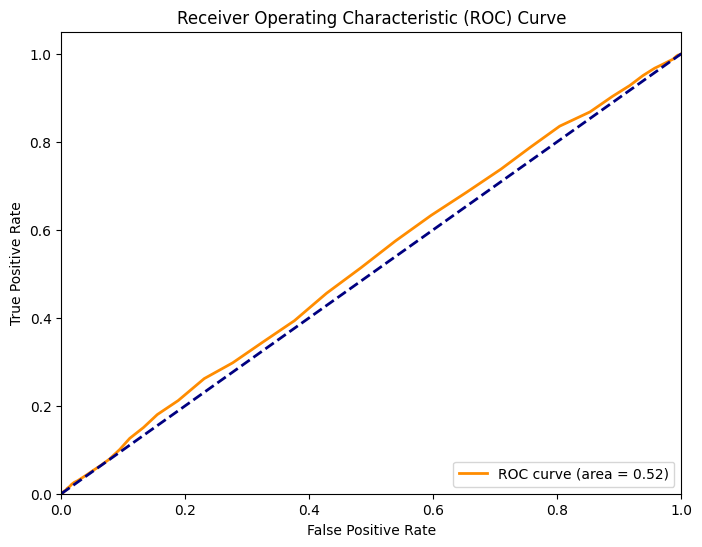

In [27]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**MODEL-2**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression(C=1e9, class_weight='balanced') #MODELTRAINING

In [30]:
%%time
logreg.fit(X_train, y_train)     #MODEL FITTING

CPU times: user 128 ms, sys: 63.1 ms, total: 191 ms
Wall time: 112 ms


LogisticRegression(C=1000000000.0, class_weight='balanced')

In [31]:
# predict the training set
logreg_y_pred_train = logreg.predict(X_train)
# predict the testing set
logreg_y_pred_test = logreg.predict(X_test)

In [32]:
# getting probabilities for the target in array form
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [33]:
import sklearn.metrics as metrics

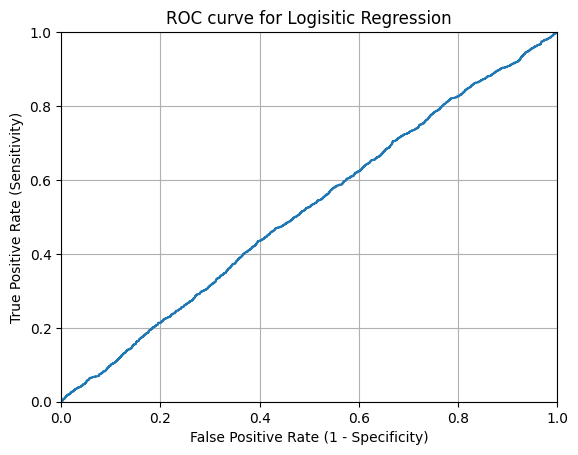

In [34]:
# ROC Curve graph
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logisitic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [51]:
s1 = [2924, 130000, 'M', 'University', 'Single', 26, 0, 0, 0, 2, 2, 0, 16435, 17166, 19478, 19862, 19403, 21070, 1300, 2600, 1000, 0, 2000, 2000,0]  # predicting the model

# Remove elements at indices 2, 3, and 4
indices_to_remove = [2, 3, 4]
s1 = [value for index, value in enumerate(s1) if index not in indices_to_remove]

# Convert to numpy array                                                                  # testing a sample data
import numpy as np
array = np.asarray(s1)

# Reshape the array
r1 = array.reshape(1, -1)  # Reshape to a single sample with multiple features


In [52]:
# Ensure that r1 has the same number of features as the training data
# Adjust the number of features in r1 if necessary
# Then, proceed with transforming the data
s2 = scaler.transform(r1)
# Continue with prediction
p1 = rfc.predict(s2)
if p1 == 1:
    print("The prediction is default.")
else:
    print("The prediction is non-default.")


The prediction is non-default.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
